In [28]:
import torch
from torch import nn
from data_loader import get_loader

torch.cuda.set_device(0)

In [29]:
class SimpleAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(SimpleAutoencoder, self).__init__()
        
        layers = []
        layers += [nn.Linear(input_dim, 200)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(200, 100)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(100, 50)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(50, 10)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(10, 5)]
        self.encoder = nn.Sequential(*layers)
        
        layers = []
        layers += [nn.Linear(5, 10)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(10, 50)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(50, 100)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(100, 200)]
        layers += [nn.ReLU(True)]
        layers += [nn.Linear(200, input_dim)]
        self.decoder = nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [30]:
timeframe = 60
data = get_loader(timeframe=timeframe, batch_size = 8192)

In [31]:
# define input dimention
lr = 1e-3
ds = iter(data)
input_dim = next(ds).shape[2]
# inizialise all needed parameters
model = SimpleAutoencoder(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [32]:
model.cuda()

SimpleAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=420, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=50, out_features=10, bias=True)
    (7): ReLU(inplace)
    (8): Linear(in_features=10, out_features=5, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=10, out_features=50, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=50, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=100, out_features=200, bias=True)
    (7): ReLU(inplace)
    (8): Linear(in_features=200, out_features=420, bias=True)
  )
)

In [33]:
epoch_num = 1
# model = model.float

model.train()
for epoch in range(epoch_num):
    for i, x in enumerate(data):
        # forward
        x = x.float()
        y = model(x.cuda()).float()
        loss = criterion(y, x.cuda())
#         MSE_loss = nn.CrossEntropyLoss()(y, x)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         print(i)
    # ------- log output ---------
    print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
          .format(epoch + 1, epoch_num, loss.data, 0))
   

epoch [1/1], loss:0.0153, MSE_loss:0.0000


In [35]:
model.eval()
for i, x in enumerate(data):
    x = x.float()
    y = model(x[0].cuda())
    loss = criterion(y,x[0].cuda())
    print(criterion(y,x[0].cuda()))
    break;

tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward>)


In [36]:
loss.data

tensor(0.0121, device='cuda:0')

In [37]:
# test soll folgendes ausgeben
# 10 höchsten Werte mit Datum!


In [38]:
import pandas as pd

In [39]:
df_autoencoder = pd.read_csv('data/autoencoder_v1_PAH3DEEUR_1 Min_Bid_2008.10.21_2018.10.27', header=None)
df = pd.read_csv('data/PAH3DEEUR_1 Min_Bid_2008.10.21_2018.10.27.csv')

In [41]:
print(df_autoencoder.shape)
print(df.shape)
dp = get_loader(batch_size=1, timeframe=timeframe)

(1322758, 7)
(1322758, 6)


In [61]:
result = []
for i, x in enumerate(dp):
    # add value to pandas 
#     x = x.unsqueeze(1)
    a = criterion(x.float().cuda(), model(x.float().cuda()).cuda()).data.cpu().numpy()
    result.append(a)

In [62]:
df_r = pd.DataFrame(result)

In [63]:
df_r.to_csv('data/result.csv', header=None)

In [64]:
df_r[0].nlargest(5)

514550    1.333259
514552    1.316868
514551    1.316737
514549    1.310680
514548    1.285482
Name: 0, dtype: float32

In [65]:
df_r.describe()

,0
count,1.322698e+06
mean,1.037955e-02
std,3.487656e-02
min,1.323164e-05
25%,1.328233e-05
50%,1.328233e-05
75%,4.294764e-03
max,1.333259e+00


In [66]:
df[513047:513047+1]

,Time (UTC),Open,High,Low,Close,Volume
513047,2016.08.31 13:49:00,45.94,45.975,45.939,45.96,6.2002


In [67]:
import matplotlib.pyplot as plt

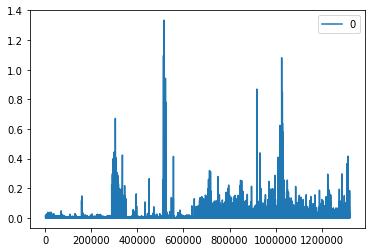

In [68]:
df_r.plot()
plt.show()

In [102]:
# df_r[303805-25:303805+15]
df[1315013+timeframe:1315013+timeframe+1]

,Time (UTC),Open,High,Low,Close,Volume
1315073,2018.10.19 12:55:00,53.538,53.737,53.498,53.727,2.81701


In [101]:
df_p = df_r[1100000:]
df_p[df_p[0] > 0.4]

,0
1315013,0.404633
1315014,0.411485
1315015,0.410038
1315016,0.411538
1315017,0.410394
1315018,0.407227
1315019,0.416835
1315020,0.416084
1315021,0.415020
1315022,0.414075


In [88]:
for i, x in enumerate(dp):
    print(x.shape)
    break

torch.Size([1, 1, 420])
